# **자주 사용하는 단축키**

* ctrl + m h : 단축키 표시
* ctrl + shift + enter : 섹션 셀 삽입
* ctrl + m d : 선택 셀 삭제
* ctrl + enter : 코드셀 실행
* shift + enter : 셀을 실행하고 다음 셀 선택
* ctrl + m b : 아래에 코드 셀 삽입
* ctrl + m v : 아래에 텍스트 셀 삽입
* ctrl + . : 모든출력 지우기
* ctrl + shift + a : 모든 셀 선택




# **학습 라이브러리**

- numpy
- scipy
- pandas
- scikit learn
- tensorflow
- keras
- pytorch
- matplotlib
- seaborn

# Chapter2 데이터 전처리

## 2.1 데이터 탐색

### 2.1.3 파이썬 데이터 탐색

타이타닉 데이터

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 타이타닉 데이터
df_raw = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
print(df_raw)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [ ]:
# 변수 타입 변환
df_type = df_raw.copy()
df_type["Survived"]=df_type["Survived"].astype(str) # 범주형 변수
df_type["Pclass"]=df_type["Pclass"].astype(str)

print(df_type.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB
None


In [ ]:
# 데이터 기술 통계 확인
df1 = df_type.copy()

print(df1.describe(include='all'))

        PassengerId Survived Pclass                     Name   Sex  \
count    891.000000      891    891                      891   891   
unique          NaN        2      3                      891     2   
top             NaN        0      3  Braund, Mr. Owen Harris  male   
freq            NaN      549    491                        1   577   
mean     446.000000      NaN    NaN                      NaN   NaN   
std      257.353842      NaN    NaN                      NaN   NaN   
min        1.000000      NaN    NaN                      NaN   NaN   
25%      223.500000      NaN    NaN                      NaN   NaN   
50%      446.000000      NaN    NaN                      NaN   NaN   
75%      668.500000      NaN    NaN                      NaN   NaN   
max      891.000000      NaN    NaN                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare    Cabin  \
count   714.000000  891.000000  891.000000     891  891.000000      204   
unique   

In [ ]:
# pclass 탑승객의 빈도수
df1 = df_type.copy()
print(df1.groupby("Pclass").size())
print(df1.groupby("Pclass").count()["PassengerId"])

Pclass
1    216
2    184
3    491
dtype: int64
Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64


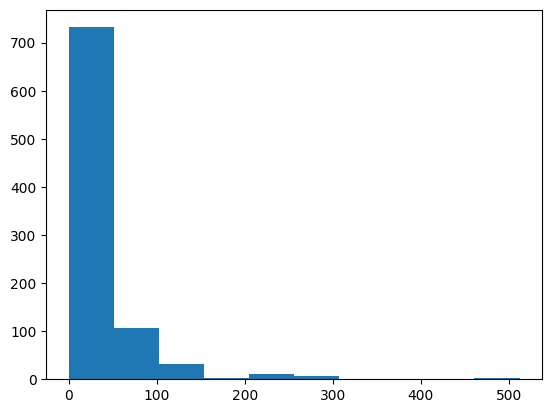

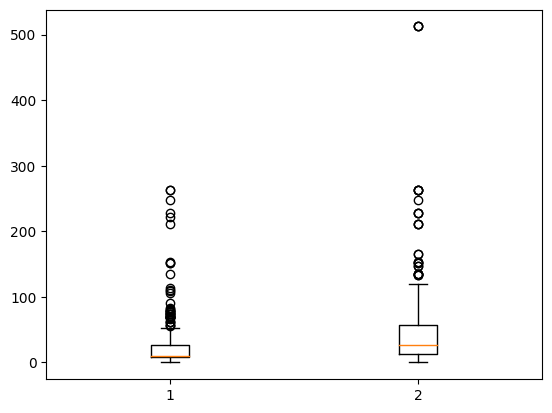

In [ ]:
# Histogram
df1 = df_type.copy()
plt.hist(df1["Fare"])
plt.show()

# 데이터 분리
data_0 = df1[df1["Survived"]=='0']["Fare"]
data_1 = df1[df1["Survived"]=='1']["Fare"]

# boxplot
fig, ax = plt.subplots()
ax.boxplot([data_0, data_1])
plt.show()


In [ ]:
# 성별 간에 생존자 수 차이
df_a = df_type.copy()


df_male = df_a[df_a["Sex"]=="male"]
df_female = df_a[df_a["Sex"]=="female"]
male_dead = df_male.groupby("Survived").size()[0]
male_survive = df_male.groupby("Survived").size()[1]
male_survive_rate = male_survive / (male_survive + male_dead)

female_dead = df_female.groupby("Survived").size()[0]
female_survive = df_female.groupby("Survived").size()[1]
female_survive_rate = female_survive / (female_survive + female_dead)

print("male survive rate : %0.3f \nfemale survive rate : %0.3f" %(male_survive_rate, female_survive_rate))



male survive rate : 0.189 
female survive rate : 0.742


## 2.2 데이터 전처리 개요

### 2.2.1 데이터 전처리 유형

데이터 전처리는 데이터 가공(data manipulation), 데이터 핸들링(data handling) 등 으로 불린다

### 2.2.2 데이터 변환

In [ ]:
import numpy as np
import pandas as pd


#data 생성
meat_consumption_korean = 5*np.random.randn(1000)+53.9
meat_consumption_japan = 4*np.random.randn(1000)+32.7

meat_consumption_df = pd.DataFrame({"korean":meat_consumption_korean,
                                    "japanese":meat_consumption_japan})
print(meat_consumption_df)

        korean   japanese
0    62.944924  32.239710
1    59.376917  29.135193
2    50.220279  35.672295
3    54.068528  22.596898
4    58.068487  26.614799
..         ...        ...
995  47.402305  36.639323
996  47.180409  30.649736
997  51.608790  42.494122
998  50.356799  21.792637
999  53.548624  33.086833

[1000 rows x 2 columns]


In [ ]:
# z 표준화 3가지
import scipy.stats as ss
df = meat_consumption_df.copy()
df["korean_zscore"] = ss.zscore(df["korean"])
df["japanese_zscore"] = ss.zscore(df["japanese"])

df["korean_zscore_np"] = (df["korean"]-np.mean(df["korean"]))/np.std(df["korean"])
df["japanese_zscore_np"] = (df["japanese"]-np.mean(df["japanese"]))/np.std(df["japanese"])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df["korean_zscore_skl"] = scaler.fit_transform(df[["korean"]]) # series객체 넣어야함
df["japanese_zscore_skl"] = scaler.fit_transform(df[["japanese"]])
print(type(df["korean"]))
print(type(df[["korean"]]))

print(df)


<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
        korean   japanese  korean_zscore  japanese_zscore  korean_zscore_np  \
0    62.944924  32.239710       1.809419        -0.152670          1.809419   
1    59.376917  29.135193       1.107131        -0.932440          1.107131   
2    50.220279  35.672295      -0.695161         0.709501         -0.695161   
3    54.068528  22.596898       0.062286        -2.574681          0.062286   
4    58.068487  26.614799       0.849594        -1.565494          0.849594   
..         ...        ...            ...              ...               ...   
995  47.402305  36.639323      -1.249821         0.952392         -1.249821   
996  47.180409  30.649736      -1.293496        -0.552028         -1.293496   
997  51.608790  42.494122      -0.421862         2.422958         -0.421862   
998  50.356799  21.792637      -0.668290        -2.776690         -0.668290   
999  53.548624  33.086833      -0.040046         0.060104

In [ ]:
# minmax 표준화
from sklearn.preprocessing import MinMaxScaler

df = meat_consumption_df.copy()
scaler = MinMaxScaler()

df["korean_mm"] = scaler.fit_transform(df[["korean"]])
df["japanese_mm"] = scaler.fit_transform(df[["japanese"]])


df["korean_mm_np"]=(df["korean"]-df["korean"].min()) / (df["korean"].max()-df["korean"].min())
df["japanese_mm_np"]=(df["japanese"]-df["japanese"].min()) / (df["japanese"].max()-df["japanese"].min())
print(df)



        korean   japanese  korean_mm  japanese_mm  korean_mm_np  \
0    62.944924  32.239710   0.776909     0.485801      0.776909   
1    59.376917  29.135193   0.679303     0.384028      0.679303   
2    50.220279  35.672295   0.428813     0.598330      0.428813   
3    54.068528  22.596898   0.534086     0.169686      0.534086   
4    58.068487  26.614799   0.643509     0.301403      0.643509   
..         ...        ...        ...          ...           ...   
995  47.402305  36.639323   0.351724     0.630032      0.351724   
996  47.180409  30.649736   0.345654     0.433678      0.345654   
997  51.608790  42.494122   0.466797     0.821967      0.466797   
998  50.356799  21.792637   0.432548     0.143320      0.432548   
999  53.548624  33.086833   0.519863     0.513572      0.519863   

     japanese_mm_np  
0          0.485801  
1          0.384028  
2          0.598330  
3          0.169686  
4          0.301403  
..              ...  
995        0.630032  
996        0.433678

USJudgeRatings data


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as ss

df = pd.read_csv("/content/drive/MyDrive/bigdata_sample/USJudgeRatings.csv")

1.0859724796276253
-1.5582154642293153


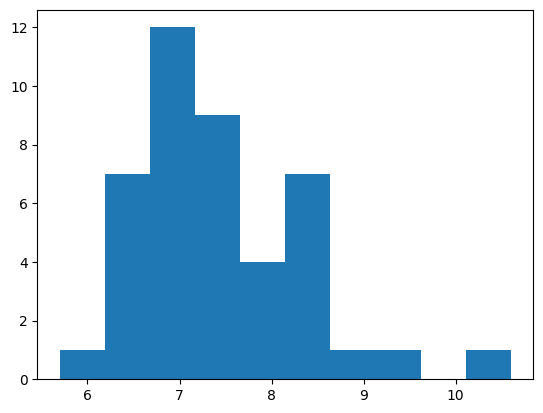

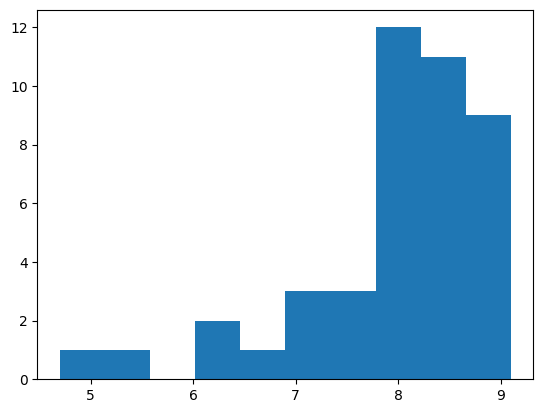

In [ ]:
df1 = df.copy()
# 왜도
print(ss.skew(df1["CONT"]))
print(ss.skew(df1["PHYS"]))

plt.hist(df1["CONT"])
plt.show()

plt.hist(df1["PHYS"])
plt.show()


In [ ]:
df1 = df.copy()

# 왜도에 따른 변수 변환
print(df1.head(5))
df["CONT2"] = np.log10(df["CONT"])
df["PHYS2"] = np.log10(np.max(df["PHYS"]+1)- df["PHYS"])

print(ss.skew(df["CONT2"]))
print(ss.skew(df["PHYS2"]))




       Unnamed: 0  CONT  INTG  DMNR  DILG  CFMG  DECI  PREP  FAMI  ORAL  WRIT  \
0   AARONSON,L.H.   5.7   7.9   7.7   7.3   7.1   7.4   7.1   7.1   7.1   7.0   
1  ALEXANDER,J.M.   6.8   8.9   8.8   8.5   7.8   8.1   8.0   8.0   7.8   7.9   
2  ARMENTANO,A.J.   7.2   8.1   7.8   7.8   7.5   7.6   7.5   7.5   7.3   7.4   
3     BERDON,R.I.   6.8   8.8   8.5   8.8   8.3   8.5   8.7   8.7   8.4   8.5   
4    BRACKEN,J.J.   7.3   6.4   4.3   6.5   6.0   6.2   5.7   5.7   5.1   5.3   

   PHYS  RTEN  
0   8.3   7.8  
1   8.5   8.7  
2   7.9   7.8  
3   8.8   8.7  
4   5.5   4.8  
0.6555571886692441
0.5824357748750438


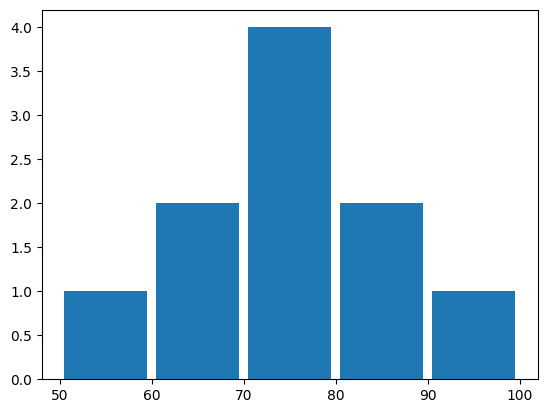

In [ ]:
# histogram 범주화
data = [["철수", 52],["영희", 92],["미영", 84],["시완", 71],["미경", 65],["영환", 81],["숙경", 66],["부영", 77],["민섭", 73],["보연", 74]]
df = pd.DataFrame(data, columns=["이름", "성적"])

plt.hist(df["성적"], bins=5, range=[50,100], rwidth = 0.9) # 5개 구간
plt.show()

   이름  성적 등급
0  철수  52  F
1  영희  92  A
2  미영  84  A
3  시완  71  D
4  미경  65  F
5  영환  81  B
6  숙경  66  D
7  부영  77  B
8  민섭  73  C
9  보연  74  C


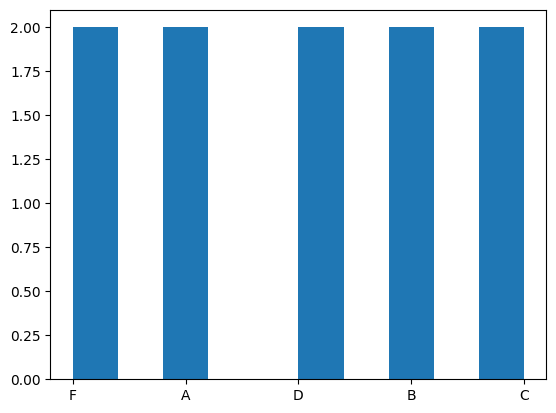

In [ ]:
# 조건문으로 구간 나누기
# df2 = df.copy()
# df2["등급"] =0

# df2.loc[(df["성적"]<60),"등급"] = "F"
# df2.loc[(df["성적"]>=60)&(df["성적"]<70),"등급"] = "D"
# df2.loc[(df["성적"]>=70)&(df["성적"]<80),"등급"] = "C"
# df2.loc[(df["성적"]>=80)&(df["성적"]<90),"등급"] = "B"
# df2.loc[(df["성적"]>=90),"등급"] = "A"
# # print(df2)


# #cut 함수 이용
df4 = df.copy()
df4["등급"] = pd.cut(x=df4["성적"], bins=[0,60,70,80,90,100], labels=["F", "D", "C", "B", "A"],
                   include_lowest=True) # 각 구간의 낮은 경계값 포함
# print(df4)

# qcut : 각 범주에 균등한 수의 데이터 채워지도록 분할
df5 = df.copy()
df5["등급"] = pd.qcut(x=df5["성적"], q=5, labels=["F","D","C","B","A"])
print(df5)
plt.hist(df5["등급"])
plt.show()


### 2.2.3 차원축소 : PCA(주성분분석)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris = pd.read_csv("/content/drive/MyDrive/bigdata_sample/iris.csv")

In [ ]:
# 범주형 변수 분리
df = iris.drop("species", axis=1)
df_species = iris["species"]
print(df_species)

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


In [ ]:
# 변수 정규화
df2=df.copy()
print(df2.columns)

x = StandardScaler()
df2["sepal_length"] = x.fit_transform(df2[["sepal_length"]])
df2["sepal_width"] = x.fit_transform(df2[["sepal_width"]])
df2["petal_length"] = x.fit_transform(df2[["petal_length"]])
df2["petal_width"] = x.fit_transform(df2[["petal_width"]])

# print(df2)

# PCA 수행
pca = PCA(n_components=4)
p_score = pca.fit_transform(df2)
print(p_score.shape)
print(pca.explained_variance_ratio_)


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
(150, 4)
[0.72962445 0.22850762 0.03668922 0.00517871]


### 2.2.4 결측치 처리

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/bigdata_sample/titanic.csv")

In [ ]:
print(df.isnull().sum())
print(df.isnull().sum().sum()) # 결측치 총 개수

df1 = df.dropna(axis=0)
print(df1.shape)

df2 = df.dropna(subset=["Age"], axis=0) # Age열의 na만 삭제
print(df2.shape)
# 평균값 대체
avg_age = df["Age"].mean()
df3 = df.copy()
df3["Age"].fillna(avg_age, inplace=True)
print(df3.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
866
(183, 12)
(714, 12)
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# 최빈값 대체
df4 = df.copy()
print(df4.isnull().sum())
mode = df4["Embarked"].mode()[0]
df4["Embarked"].fillna(mode, inplace=True)
print(df4.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [ ]:
# 인접값 대체
data = [1,2,3,None,None,None,5,6,7]
df = pd.DataFrame(data, columns=["test"])
print(df.fillna(method="ffill")) # 이전(앞선)데이터로 채움
print(df.fillna(method="bfill")) # 다음 데이터로 채움



   test
0   1.0
1   2.0
2   3.0
3   3.0
4   3.0
5   3.0
6   5.0
7   6.0
8   7.0
   test
0   1.0
1   2.0
2   3.0
3   5.0
4   5.0
5   5.0
6   5.0
7   6.0
8   7.0


### 2.2.5 이상치 처리

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = 10*np.random.randn(200)+50
df = pd.DataFrame({"data":data})
df.loc[200] = 2
df.loc[201] = 100
df.loc[202] = 10
df.loc[203] = 110



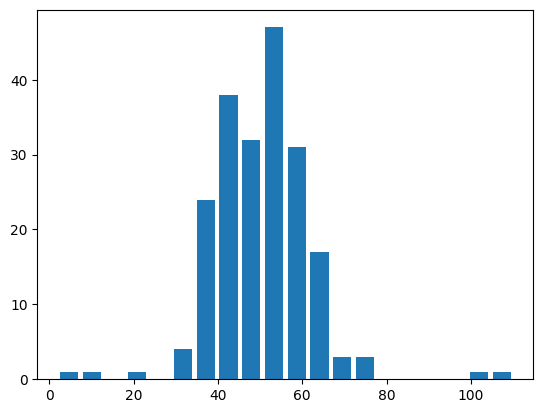

In [ ]:
# 히스토그램 판별

plt.hist(df, bins=20, rwidth=0.8)
plt.show()

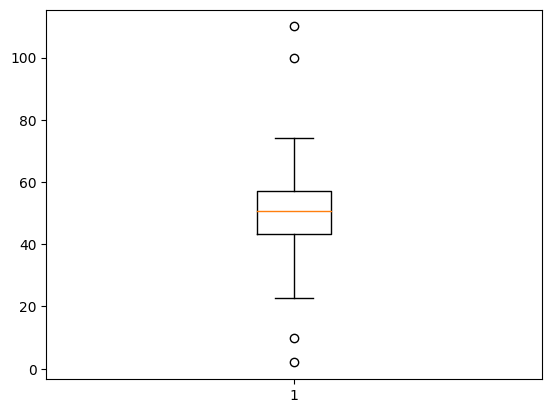

43.231959382589594 57.159342206683746 13.927382824094153
             data
count  204.000000
mean    50.161771
std     11.604720
min      2.000000
25%     43.231959
50%     50.729165
75%     57.159342
max    110.000000


In [ ]:
# IQR 사용
df2 = df.copy()
plt.boxplot(df2["data"])
plt.show()

Q1 = df2["data"].quantile(.25)
Q3 = df2["data"].quantile(.75)
IQR = Q3-Q1
print(Q1, Q3, IQR)

print(df2.describe())


In [ ]:
# outlier 구하기
df3 = df.copy()

low_con = Q1 - 1.5*IQR
upper_con = Q3 + 1.5*IQR
low_out = df3[df3["data"]<low_con]
upper_out = df3[df3["data"]>upper_con]
print(low_out, upper_out, sep="\n")

     data
200   2.0
202  10.0
      data
201  100.0
203  110.0


### 2.2.6 평활화(smoothing)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/bigdata_sample/lynx.csv")

In [ ]:
df2 = df.copy()
df2 = df2.iloc[:,1:]

print(df2.head(5))
print(df2.info())

   time  value
0  1821    269
1  1822    321
2  1823    585
3  1824    871
4  1825   1475
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   time    114 non-null    int64
 1   value   114 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB
None


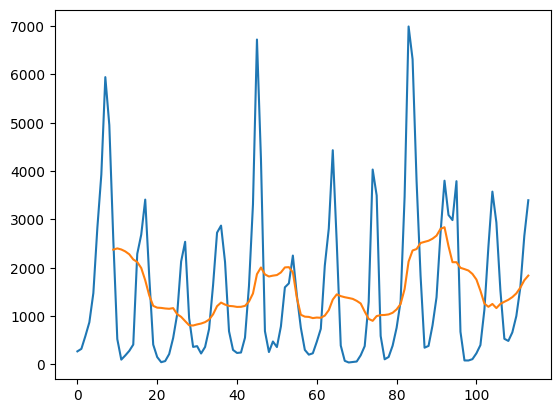

In [ ]:
# 단순이동평균
df3 = df2.copy()
df3["sma"] = df3["value"].rolling(10).mean()

plt.plot(df3["value"])
plt.plot(df3["sma"])
plt.show()

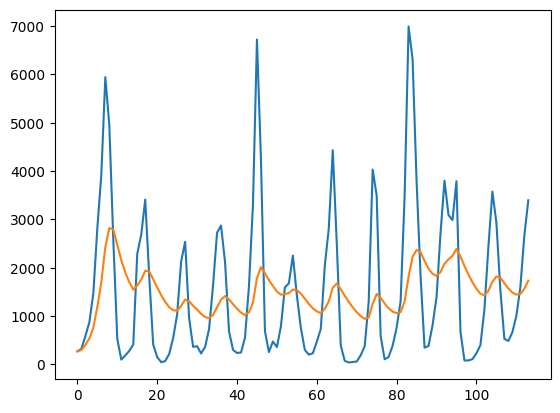

In [ ]:
# 지수 이동평균
df4 = df2.copy()
df4["ewma"] = df4["value"].ewm(10).mean()
plt.plot(df4["value"])
plt.plot(df4["ewma"])
plt.show()

# Chapter3 데이터 분석

## 3.1 빅데이터 분석 과정

### 3.1.1 빅데이터 분석과정의 이해

In [ ]:
import pandas as pd


### 3.1.2 사이킷런 패키지

### 3.1.3 분석모델 성능 평가 방법


## 3.2 지도학습 - 분류

### 3.2.1 의사결정나무

In [ ]:
import numpy as np
import pandas as pd
import sklearn

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv("/content/drive/MyDrive/bigdata_sample/titanic.csv")

In [ ]:
df2 = df.copy()
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
# 데이터 전처리
df2 = df.copy()
avg_age = df2["Age"].mean()
df2["Age"] = df2["Age"].fillna(avg_age)
df2.drop("Cabin", inplace= True, axis=1)
df2["Embarked"] = df2["Embarked"].fillna(df2["Embarked"].mode()[0])
print(df2.info())

from sklearn.preprocessing import LabelEncoder
print(df2.describe(include='all'))

# 레이블 인코딩 : 범주형 변수를 숫자형으로 변환
df2["Sex"] = LabelEncoder().fit_transform(df2["Sex"])
df2["Embarked"] = LabelEncoder().fit_transform(df2["Embarked"])
print(df2.head(10))

# 파생 변수 생성
df2["FamilySize"] = df2["SibSp"]+df2["Parch"]
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None
        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Br

In [ ]:
# 분석용 데이터 셋 준비
df3 = df2.copy()
x = df3[["Pclass","Sex","Age","Fare","Embarked","FamilySize"]]
y = df3["Survived"]

# 학습 / 테스트 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2 , random_state=11)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(712, 6) (179, 6) (712,) (179,)


In [ ]:
# 데이터 분석
dt=DecisionTreeClassifier(random_state=11)
dt.fit(x_train, y_train)

pred = dt.predict(x_test)

# 성능 평가
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(acc)

0.7877094972067039


### 3.2.2 KNN

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/bigdata_sample/iris.csv")

In [ ]:
# 데이터 탐색
df2 = df.copy()
print(df2.head())
print(df2.info())
print(df2.describe(include="all"))

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
        sepal_length  sepal_width  petal_length  petal_width species
count     150.000000   150.000000    150.000000   150.000000     150
unique          

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 데이터 전처리
minmax = MinMaxScaler()
df2["sepal_length"] = minmax.fit_transform(df2[["sepal_length"]])
df2["sepal_width"] = minmax.fit_transform(df2[["sepal_width"]])
df2["petal_length"] = minmax.fit_transform(df2[["petal_length"]])
df2["petal_width"] = minmax.fit_transform(df2[["petal_width"]])

print(df2)

     sepal_length  sepal_width  petal_length  petal_width    species
0        0.222222     0.625000      0.067797     0.041667     setosa
1        0.166667     0.416667      0.067797     0.041667     setosa
2        0.111111     0.500000      0.050847     0.041667     setosa
3        0.083333     0.458333      0.084746     0.041667     setosa
4        0.194444     0.666667      0.067797     0.041667     setosa
..            ...          ...           ...          ...        ...
145      0.666667     0.416667      0.711864     0.916667  virginica
146      0.555556     0.208333      0.677966     0.750000  virginica
147      0.611111     0.416667      0.711864     0.791667  virginica
148      0.527778     0.583333      0.745763     0.916667  virginica
149      0.444444     0.416667      0.694915     0.708333  virginica

[150 rows x 5 columns]


In [ ]:
# 데이터 셋 준비
df3 = df2.copy()
x = df3[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
y = df3["species"]

# 데이터 분할
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# 분석
knn = KNeighborsClassifier(n_neighbors=3) # n_neighbors값이 달라짐에 따라 성능 달라짐 조정
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

# 성능 측정
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(acc)


0.9333333333333333


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/bigdata_sample/titanic.csv")
# print(df.head(5))
# print(df.info())
# print(df.describe(include='all'))

df["Age"].fillna(df["Age"].mean(), inplace=True)
df.drop("Cabin", axis=1, inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
df["FamilySize"] = df["SibSp"] + df["Parch"]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Sex"]=le.fit_transform(df["Sex"])
df["Embarked"] = le.fit_transform(df["Embarked"])
# print(df.groupby("Sex").size())
# print(df.groupby("Embarked").size())

# 수기변환
# df["Sex"]= df["Sex"].replace("female",1)
# df["Sex"]= df["Sex"].replace("male",2)
# df["Embarked"]= df["Embarked"].replace("C",1)
# df["Embarked"]= df["Embarked"].replace("Q",2)
# df["Embarked"]= df["Embarked"].replace("S",3)
# print(df.groupby("Sex").size())
# print(df.groupby("Embarked").size())

from sklearn.model_selection import train_test_split
y = df["Survived"]
x = df[["Pclass","Sex","Age","Fare","Embarked","FamilySize"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)


from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,pred)
print(acc)

from sklearn.metrics import classification_report
rpt = classification_report(y_test, pred)
print(rpt)

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,pred)
print(mat)


(712, 6) (179, 6) (712,) (179,)
0.7430167597765364
              precision    recall  f1-score   support

           0       0.78      0.86      0.81       118
           1       0.65      0.52      0.58        61

    accuracy                           0.74       179
   macro avg       0.71      0.69      0.70       179
weighted avg       0.73      0.74      0.74       179

[[101  17]
 [ 29  32]]


### 3.2.3 SVM


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/bigdata_sample/titanic.csv")


In [ ]:
# 데이터 탐색
df2 = df.copy()
# print(df.info())
# print(df.describe(include="all"))

# 전처리
df2["Age"] = df2["Age"].fillna(df2["Age"].mean())
df2["Embarked"] = df2["Embarked"].fillna(df2["Embarked"].mode()[0])
df2.drop("Cabin", axis=1,inplace=True)
df2["FamilySize"] = df2["SibSp"] + df2["Parch"]

print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB
None


In [ ]:
# one-hot encoding
onehot_sex = pd.get_dummies(df2["Sex"])
onehot_embarked = pd.get_dummies(df2["Embarked"])
df3 = pd.concat([df2, onehot_sex, onehot_embarked], axis=1) # axis 조심
print(df3.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  FamilySize   891 non-null    int64  
 12  female       891 non-null    uint8  
 13  male         891 non-null    uint8  
 14  C            891 non-null    uint8  
 15  Q            891 non-null    uint8  
 16  S            891 non-null    uint8  
dtypes: float64(2), int64(6), object(4), uint8(5)
memory usage: 88.0+ KB
None


In [ ]:
# 분석 데이터셋 준비
from sklearn.model_selection import train_test_split
y = df3["Survived"]
x = df3[["Pclass", "Age", "Fare", "FamilySize", "female", "male", "C", "Q", "S"]]

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=10)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(623, 9) (268, 9) (623,) (268,)


In [ ]:
# 분석
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train,y_train)
pred = svm.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
acc = accuracy_score(y_test, pred)
mat = confusion_matrix(y_test, pred)
rep = classification_report(y_test, pred)
print(acc)
print(mat)
print(rep)



0.7238805970149254
[[167   7]
 [ 67  27]]
              precision    recall  f1-score   support

           0       0.71      0.96      0.82       174
           1       0.79      0.29      0.42        94

    accuracy                           0.72       268
   macro avg       0.75      0.62      0.62       268
weighted avg       0.74      0.72      0.68       268



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def svm_test(kerner, c, gamma):
  df2 = pd.read_csv("/content/drive/MyDrive/bigdata_sample/titanic.csv")

  # 전처리
  df2["Age"] = df2["Age"].fillna(df2["Age"].mean())
  df2["Embarked"] = df2["Embarked"].fillna(df2["Embarked"].mode()[0])
  df2.drop("Cabin", axis=1,inplace=True)
  df2["FamilySize"] = df2["SibSp"] + df2["Parch"]

  # one-hot encoding
  onehot_sex = pd.get_dummies(df2["Sex"])
  onehot_embarked = pd.get_dummies(df2["Embarked"])
  df3 = pd.concat([df2, onehot_sex, onehot_embarked], axis=1) # axis 조심

  # 분석 데이터셋 준비
  y = df3["Survived"]
  x = df3[["Pclass", "Age", "Fare", "FamilySize", "female", "male", "C", "Q", "S"]]

  x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=10)

  # 분석
  svm = SVC(kernel=kerner, C=c, gamma=gamma)
  svm.fit(x_train,y_train)
  pred = svm.predict(x_test)
  acc = accuracy_score(y_test, pred)
  mat = confusion_matrix(y_test, pred)
  rep = classification_report(y_test, pred)
  print(rep)


svm_test('rbf', 1, 0.1)


              precision    recall  f1-score   support

           0       0.74      0.80      0.77       174
           1       0.57      0.48      0.52        94

    accuracy                           0.69       268
   macro avg       0.66      0.64      0.65       268
weighted avg       0.68      0.69      0.68       268



### 3.2.4 로지스틱 회귀

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
df= pd.read_csv("/content/drive/MyDrive/bigdata_sample/iris.csv")


# 로지스틱 회귀이므로 전처리 정규화 필요??
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
df["sepal_length"] = mx.fit_transform(df[["sepal_length"]])
df["sepal_width"] = mx.fit_transform(df[["sepal_width"]])
df["petal_length"] = mx.fit_transform(df[["petal_length"]])
df["petal_width"] = mx.fit_transform(df[["petal_width"]])

# print(df.info())
y = df["species"]
x = df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)
# print(x_train.shape, x_test.shape)

import sklearn
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train, y_train)
pred = lg.predict(x_test)

from sklearn.metrics import classification_report, accuracy_score
rpt = classification_report(y_test, pred)
acc = accuracy_score(y_test,pred)
print(acc)
print(rpt)

0.8333333333333334
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.78      0.70      0.74        10
   virginica       0.75      0.82      0.78        11

    accuracy                           0.83        30
   macro avg       0.84      0.84      0.84        30
weighted avg       0.83      0.83      0.83        30



### 3.2.5 랜덤 포레스트

In [ ]:
import sklearn
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/bigdata_sample/titanic.csv")

df.drop("Cabin", axis=1, inplace = True)
df["Age"].fillna(df["Age"].mean(),inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
df["FamilySize"] = df["SibSp"] + df["Parch"]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])
df["Embarked"] = le.fit_transform(df["Embarked"])

y=df["Survived"]
x=df[["Pclass","Sex","Age","Fare","Embarked","FamilySize"]]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)



from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=20)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)

from sklearn.metrics import classification_report
rpt = classification_report(y_test, pred)
print(rpt)

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       118
           1       0.95      0.62      0.75        61

    accuracy                           0.86       179
   macro avg       0.89      0.80      0.83       179
weighted avg       0.87      0.86      0.85       179



## 3.3 지도학습 - 회귀(예측)

### 3.3.1 단순 선형회귀

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/bigdata_sample/auto-mpg.csv")

print(df.head(5))
print(df.info())
print(df.describe(include="all"))

    mpg  cylinders  displacement  horsepower  weight  acceleration  model-year
0  18.0          8         307.0       130.0    3504          12.0          70
1  15.0          8         350.0       165.0    3693          11.5          70
2  18.0          8         318.0       150.0    3436          11.0          70
3  16.0          8         304.0       150.0    3433          12.0          70
4  17.0          8         302.0       140.0    3449          10.5          70
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    396 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model-year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory

<Axes: xlabel='displacement', ylabel='mpg'>

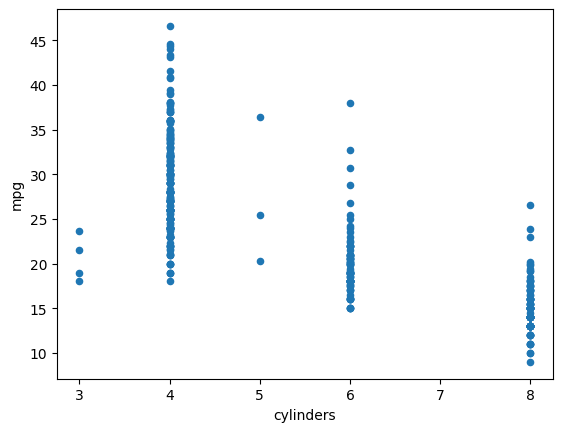

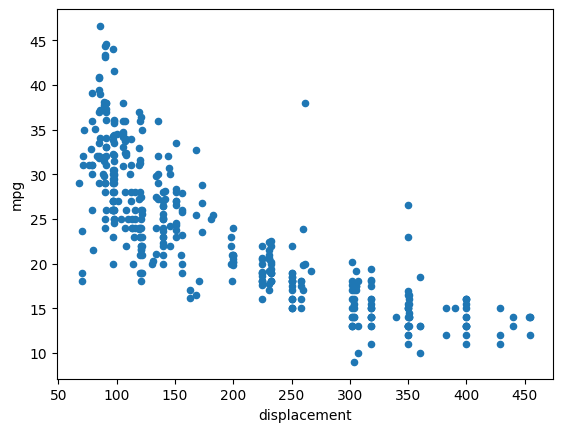

In [ ]:
# 시각화
import matplotlib.pyplot as plt

df.plot(kind="scatter", x="cylinders", y="mpg")
df.plot(kind="scatter", x="displacement", y="mpg")

In [ ]:
df2 = df.dropna(axis=0)
y = df2["mpg"]
x = df2[["weight"]]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
print(lr.coef_)
print(lr.intercept_)


# 성능 평가
from sklearn.metrics import r2_score
score = r2_score(y_test, pred)
print(score)

[-0.00774371]
46.62501834798047
0.7015633872576372


### 3.3.2 다중 선형회귀

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/bigdata_sample/housing.csv")

print(df.info())
print(df.describe(include="all"))
print(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
           longitude      latitude  housing_median_age   total_rooms  \
count   20640.000000  20640.000000        20640.000000  20640.000000   
unique           NaN           NaN                 NaN           NaN   
top              NaN          

In [ ]:
df2 = df.copy()

df2.dropna(axis=0, inplace=True)
df2.drop("ocean_proximity", axis=1, inplace=True)


# 다중 회귀
y_m = df2["median_house_value"]
x_m = df2.drop("median_house_value", axis=1)
# 단순 회귀
y = df2["median_house_value"]
x = df2[["median_income"]]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train_m, x_test_m, y_train_m, y_test_m = train_test_split(x_m, y_m, test_size=0.3, random_state=42)


from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr_m = LinearRegression()
lr.fit(x_train, y_train)
lr_m.fit(x_train_m, y_train_m)

from sklearn.metrics import r2_score
pred = lr.predict(x_test)
pred_m = lr_m.predict(x_test_m)
r2 = r2_score(y_test, pred)
r2_m = r2_score(y_test_m, pred_m)
print(r2, r2_m)



0.4761911795039645 0.6445130291082337


### 3.3.3 의사결정나무

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/bigdata_sample/housing.csv")
df2 = df.copy()

df2.dropna(axis=0, inplace=True)
df2.drop("ocean_proximity", axis=1, inplace=True)

y = df2["median_house_value"]
x = df2.drop("median_house_value", axis=1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=3, random_state=42)
dt.fit(x_train, y_train)
pred = dt.predict(x_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
print(mse)



6793101269.876856


### 3.3.4 랜덤 포레스트

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/bigdata_sample/housing.csv")
df2 = df.copy()

df2.dropna(axis=0, inplace=True)
df2.drop("ocean_proximity", axis=1, inplace=True)

y = df2["median_house_value"]
x = df2.drop("median_house_value", axis=1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=3, random_state=42)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
print(mse)



6447828605.376922


## 3.4 비지도학습

### 3.4.1 군집분석 k-means

In [ ]:
import pandas as pd


df=pd.read_csv("/content/drive/MyDrive/bigdata_sample/iris.csv")


In [ ]:
df2 = df.copy()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2["species"] = le.fit_transform(df2["species"])

# 시각화
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

# sns.pairplot(df, hue="species")
# plt.show()

In [ ]:
from sklearn.cluster import KMeans
cluster1 = KMeans(n_clusters=3, n_init=10, max_iter=500, random_state=42)

cluster1.fit(df2)

cluster_center = cluster1.cluster_centers_
cluster_prediction = cluster1.predict(df2)
# print(pd.DataFrame(cluster_center))
# print(cluster_prediction)

df3 = df2.copy()
df3["cluster"] = cluster_prediction
print(df3)


     sepal_length  sepal_width  petal_length  petal_width  species  cluster
0             5.1          3.5           1.4          0.2        0        1
1             4.9          3.0           1.4          0.2        0        1
2             4.7          3.2           1.3          0.2        0        1
3             4.6          3.1           1.5          0.2        0        1
4             5.0          3.6           1.4          0.2        0        1
..            ...          ...           ...          ...      ...      ...
145           6.7          3.0           5.2          2.3        2        0
146           6.3          2.5           5.0          1.9        2        0
147           6.5          3.0           5.2          2.0        2        0
148           6.2          3.4           5.4          2.3        2        0
149           5.9          3.0           5.1          1.8        2        0

[150 rows x 6 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

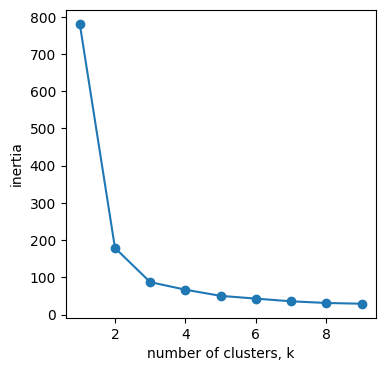

In [ ]:
# 성능 시각화
scope =range(1,10)
inertias =[] #각 군집별 오차제곱합
for k in scope:
  model = KMeans(n_clusters=k)
  model.fit(df2)
  inertias.append(model.inertia_)

plt.figure(figsize=(4,4))
plt.plot(scope, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.show()

### 3.4.2 연관분석

In [ ]:
import sklearn.cluster

# dir(sklearn)
print(sklearn.__all__)
# import sklearn.feature_selection
# dir(sklearn.feature_selection)
# print(sklearn.datasets.__all__)

['calibration', 'cluster', 'covariance', 'cross_decomposition', 'datasets', 'decomposition', 'dummy', 'ensemble', 'exceptions', 'experimental', 'externals', 'feature_extraction', 'feature_selection', 'gaussian_process', 'inspection', 'isotonic', 'kernel_approximation', 'kernel_ridge', 'linear_model', 'manifold', 'metrics', 'mixture', 'model_selection', 'multiclass', 'multioutput', 'naive_bayes', 'neighbors', 'neural_network', 'pipeline', 'preprocessing', 'random_projection', 'semi_supervised', 'svm', 'tree', 'discriminant_analysis', 'impute', 'compose', 'clone', 'get_config', 'set_config', 'config_context', 'show_versions']
